In [1]:
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_all_images(path):
    with open(path, 'rb') as f:
        everything = np.fromfile(f, dtype=np.uint8)
        images = np.reshape(everything, (-1,3,96,96))
        return np.transpose(images, (0,3,2,1))

In [3]:
data_path = './../data/stl10_binary/unlabeled_X.bin'
images =  read_all_images(data_path)
print(images.shape)

(100000, 96, 96, 3)


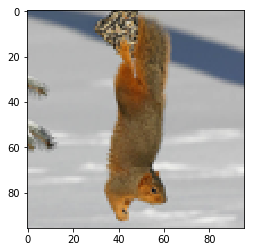

In [4]:
plt.imshow(images[66666])

In [5]:
try:
    from imageio import imsave
except:
    from scipy.misc import imsave
def save_unlabelled_images(images):
    i = 0
    for image in images:
        dir = './../data/unlabeled/'
        try:
            os.makedirs(dir, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = dir + str(i)
        imsave("%s.png" % filename, image, format="png")
        i += 1

In [6]:
save_unlabelled_images(images)

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

In [17]:
transform = transforms.ToTensor()
data_dir = './../data/'
trainset = torchvision.datasets.ImageFolder(data_dir, transform)
target = trainset.targets
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

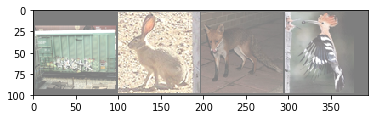

    1     1     1     1


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j].numpy() for j in range(4)))

In [19]:
print(set(target))

{1}
